In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import sys
sys.path.append('/Users/giacomo.glotzer/Desktop/Rockefeller/Kronauer/analysis')
from transcriptomics import *
from hcr import *
from primers import * 
from plotting import * 

Initializing transcriptomics package
Initializing HCR package
Initializing custom primer package
Initializing plotting package


In [2]:
black_plotting() 

In [3]:
tr = load_transcriptome_object("/Users/giacomo.glotzer/Desktop/Rockefeller/Kronauer/Analysis/biroi_transcriptome.pkl")

## OR DB 

In [4]:
# Load or_db
or_db = pd.read_excel('/Users/giacomo.glotzer/Desktop/Rockefeller/Kronauer/OR List.xlsx') 
or_db.loc[or_db.gene_name.isin(['Or5-9E198', 'Or5-9E200', 'Or5-9E201']), 'tandem_array'] = 35

In [5]:
# iterate through each row of or_db 
for i, row in or_db.iterrows(): 
    gene = tr.get_gene(row.gene_name) 
    transcript = gene.get_transcript_longest_cds()
    bounds = transcript.get_bounds()
    or_db.at[i,'start'] = bounds[0]
    or_db.at[i,'end'] = bounds[1] 
    or_db.at[i,'strand'] = transcript.strand 
    or_db.at[i, 'chr'] = transcript.chromosome
    or_db.at[i,'n_exons'] = len(transcript.exons)
    or_db.at[i,'nine_exon'] = "9E" in row['gene_name']
    or_db.at[i,'ta_size'] = or_db.loc[or_db.tandem_array == row['tandem_array']].shape[0]
or_db['start'] = or_db['start'].astype(int)
or_db['end'] = or_db['end'].astype(int)
or_db['ta_size'] = or_db['ta_size'].astype(int)
or_db['ta_index'] = or_db.groupby('tandem_array')['start'].rank(method='first', ascending=True).astype(int)

or_db.head(5)

,chromosome,gene_name,tandem_array,rank,orientation,start,end,strand,chr,n_exons,nine_exon,ta_size,ta_index
0,1,Or5-R2,70,1,3',6504395,6510987,-,Chr1,8.0,False,2,1
1,1,Or5-Q1,70,2,5',6511625,6514800,-,Chr1,7.0,False,2,2
2,1,Or5-Orco,72,3,NaN,10910490,10919026,+,Chr1,9.0,False,2,1
3,1,Or5-Q2,72,4,NaN,10934666,10938750,+,Chr1,6.0,False,2,2
4,1,Or5-9E1,73,5,NaN,10980671,10984094,+,Chr1,6.0,True,1,1


In [6]:
black_plotting()

In [18]:
# Find Or5-XA1
or_db.loc[or_db.ta_size == 9]

,chromosome,gene_name,tandem_array,rank,orientation,start,end,strand,chr,n_exons,nine_exon,ta_size,ta_index
72,2,Or5-9E52,63,73,3',16670306,16678675,-,Chr2,10.0,True,9,1
73,2,Or5-9E54,63,74,NaN,16688031,16692950,-,Chr2,9.0,True,9,2
74,2,Or5-9E55,63,75,NaN,16696351,16701856,-,Chr2,10.0,True,9,3
75,2,Or5-9E56,63,76,NaN,16701957,16707393,-,Chr2,10.0,True,9,4
76,2,Or5-9E57,63,77,NaN,16707495,16712910,-,Chr2,9.0,True,9,5
77,2,Or5-9E58,63,78,NaN,16713019,16720047,-,Chr2,9.0,True,9,6
78,2,Or5-9E59,63,79,NaN,16720145,16725418,-,Chr2,9.0,True,9,7
79,2,Or5-9E60,63,80,NaN,16725764,16732198,-,Chr2,8.0,True,9,8
80,2,Or5-9E61,63,81,5',16735591,16739519,-,Chr2,8.0,True,9,9
183,4,Or5-9E136,48,184,3',17459932,17464063,-,Chr4,8.0,True,9,1


In [19]:
tandem_arrays = [19, 79, 72, 70, 3, 35, 34, 86, 45, 80, 49, 47, 67, 48, 63]

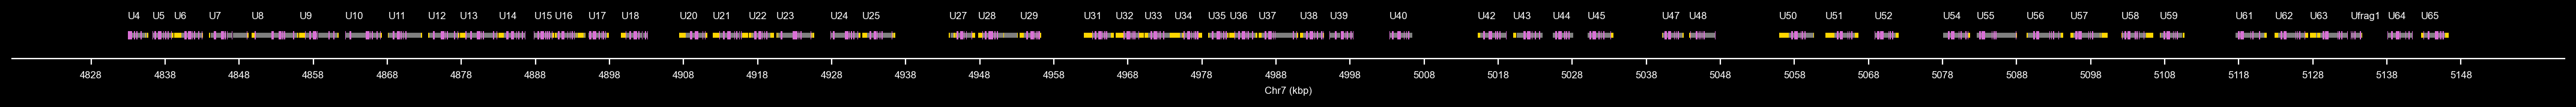

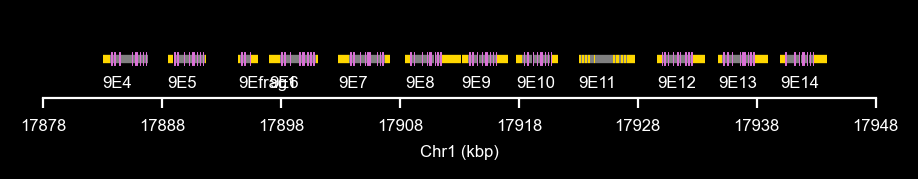

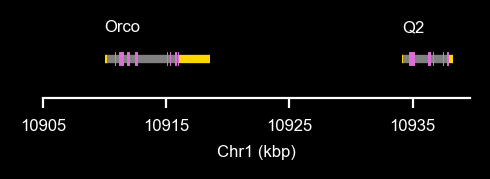

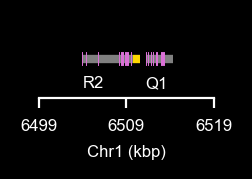

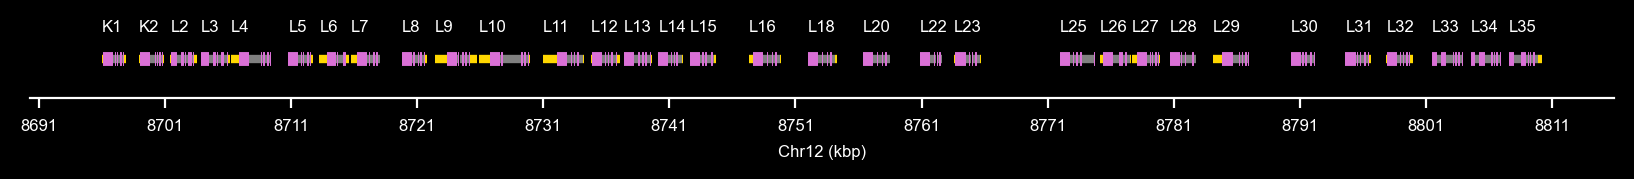

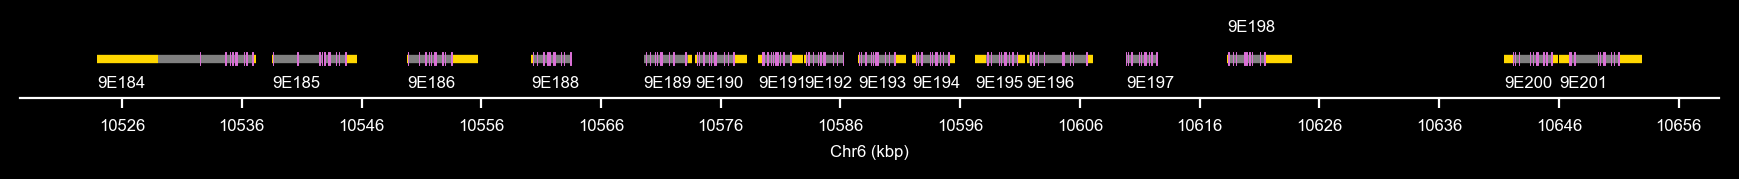

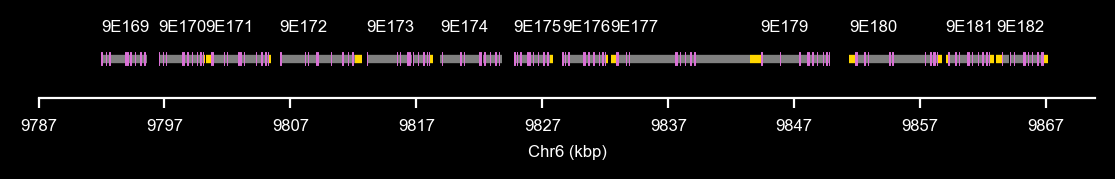

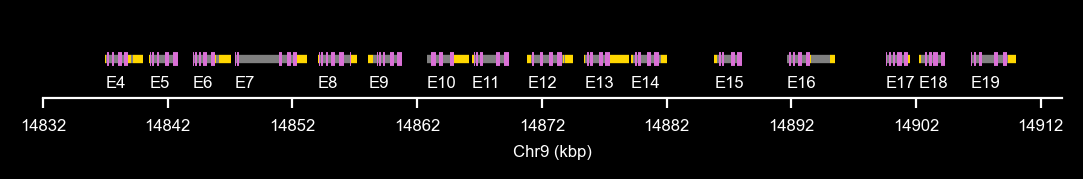

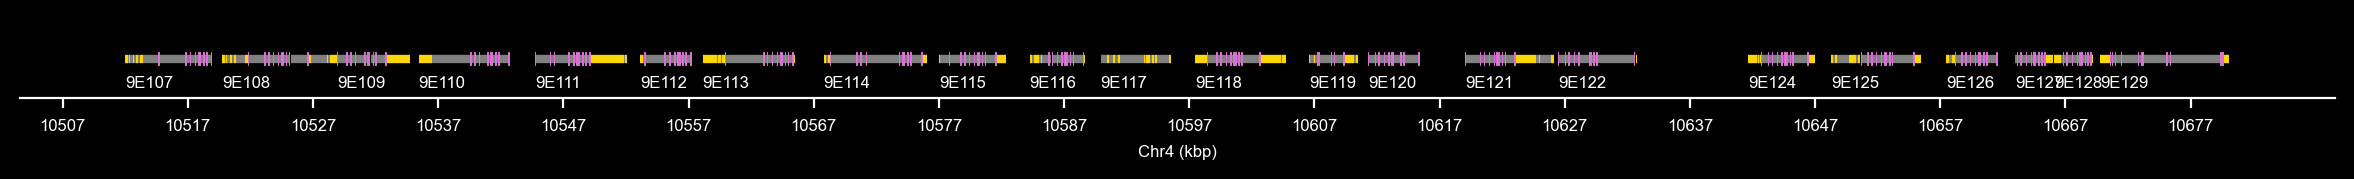

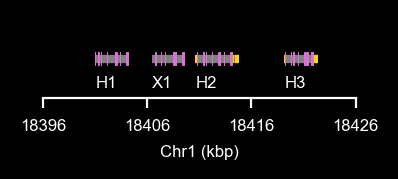

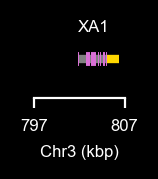

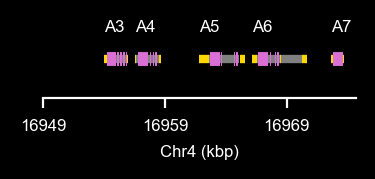

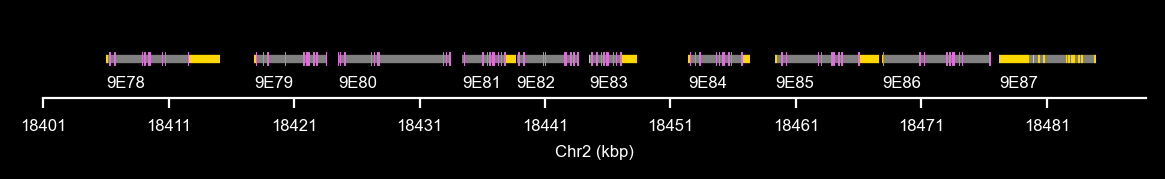

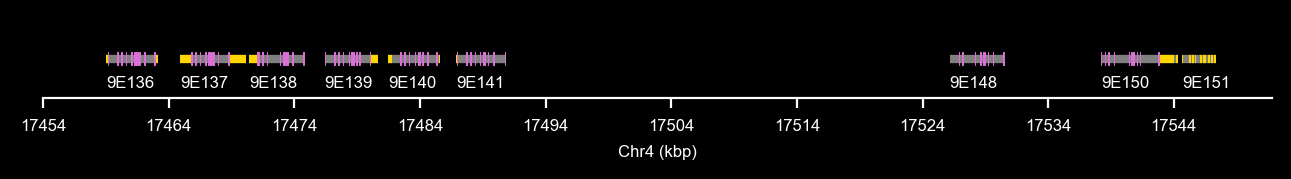

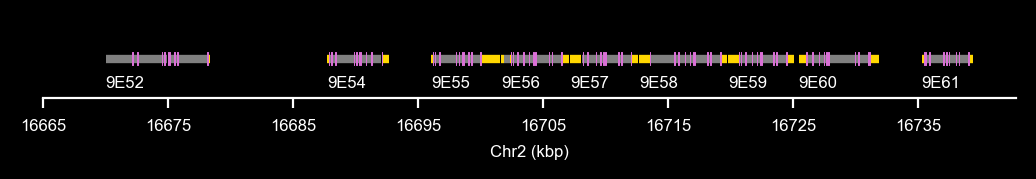

In [20]:
for tandem_array in tandem_arrays: 
    or_db_ta = or_db[or_db.tandem_array == tandem_array]
    gene_names = or_db_ta.gene_name.values

    start = or_db_ta.start.min() - 5000
    end = or_db_ta.end.max() + 5000
    chromosome = or_db_ta.chr.values[0]

    fig_width  = (end - start) / 15_000

    f, ax = plt.subplots(1, 1, figsize=(fig_width, 1), dpi=200) 

    for gene in gene_names: 
        transcript = tr.get_gene(gene).get_transcript_longest_bounds()
        for exon in transcript.exons: 
            ax.plot([exon.position[0], exon.position[1]], [1, 1], color='gold', lw=3, solid_capstyle='butt')
        for intron in transcript.introns: 
            ax.plot([intron.position[0], intron.position[1]], [1, 1], color='grey', lw=3, solid_capstyle='butt')
        for cds in transcript.cds: 
            ax.plot([cds.position[0], cds.position[1]], [1, 1], color='orchid', lw=5, solid_capstyle='butt')
        y_text = 1.8 if transcript.strand == '+' else 0.4
        ax.text(transcript.get_bounds()[0], y_text, gene.replace('Or5-', ''), fontsize=6, ha='left', va='center', color='white')

    ax.set_ylim(0, 2)

    # Divide all xticklabels by 1000000
    xticks = np.arange(start, end + 1, 10_000)
    xticklabels = [f"{int(x / 1000)}" for x in xticks]
    ax.set_xticks(xticks, labels=xticklabels, fontsize=6) 

    ax.set_xlabel(f'{chromosome} (kbp)', fontsize=6)


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([])
    plt.tight_layout()
    plt.show()
